(562, 1024)
Done.
Fitting neural network...
   Pass #1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:511: MatplotlibDeprecationWarning:

The is_string_like function was deprecated in version 2.1.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning:

The is_string_like function was deprecated in version 2.1.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements withou

   Pass #2
   Pass #3
   Pass #4
   Pass #5
   Pass #6
   Pass #7
   Pass #8
#####################
Facebook Users Don't Trust The Site With Their Data, A New Poll Finds [2018-04-02]
Facebook Controls What News People Read.
#####################
#####################
Mark Zuckerberg Extends Facebook Apology Tour With European Gig [2018-05-22]
Mark Zuckerberg Doesn't See Facebook As A Monopoly, Since Its Competition Is All Human Activity [2018-04-11]
#####################
#####################
Trump Cites Facebook Executive In 'Fake News' Twitter Rant Over Russian Indictments [2018-02-18]
This Week: News From Orlando, Spain, And Facebook [2017-06-12]
#####################
#####################
Trump Dismisses Possible Facebook Plot Because 'I'm One Of Their Great Stars' [2016-04-16]
Facebook Suspends 200 Apps Amid Data Misuse Investigation [2018-05-14]
#####################
#####################
A Year Ago, Facebook Said It Was 'Crazy' That Fake News Could've Influenced The Election [201

#####################
Miami Police Officer's Facebook Plea: 'Everyone's Life Matters' [2015-09-08]
Mark Zuckerberg Doesn't See Facebook As A Monopoly, Since Its Competition Is All Human Activity [2018-04-11]
#####################


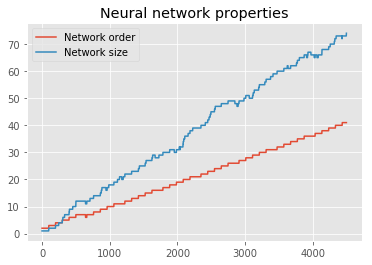

In [23]:
# coding: utf-8

from gng import GrowingNeuralGas
from sklearn import datasets, metrics
import os
import shutil
import pickle
import numpy as np;


if __name__ == '__main__':
    if os.path.exists('visualization/sequence'):
        shutil.rmtree('visualization/sequence')
    os.makedirs('visualization/sequence')
    
    search_term = "Facebook"
    
    n_samples = 100000
    
    with open('./News Data/pre-processed_news_original_headline_with_date_list.pickle', 'rb') as f:
        labels = pickle.load(f)[-n_samples:]
        
    with open('./News Data/pre-processed_news_headline_with_summary_list.pickle', 'rb') as f:
        labelsWithSummary = pickle.load(f)[-n_samples:]
    
    with open('./Sentence Vector/SentenceVector_all.pickle', 'rb') as f:
        data = pickle.load(f)[-n_samples:]
        
    filteredData = []
    filteredLabels = []
    for i in range(n_samples):
        if search_term.lower() in labelsWithSummary[i]:
            filteredData.append(data[i]);
            filteredLabels.append(labels[i])
    filteredData = np.array(filteredData)
    print(filteredData.shape)
    
    print('Done.')
    print('Fitting neural network...')
    gng = GrowingNeuralGas(filteredData, filteredLabels)
    gng.fit_network(n_max=100, e_b=0.05, e_n=0.0006, a_max=100, e_max=4, l=100, a=0.5, d=0.9995, passes=8, plot_evolution=True,animation_interval=300, data_shuffle=False)
    

In [24]:
# Make sequences as gif file

import imageio
from os import listdir
from os.path import isfile, join

mypath = "./visualization/sequence/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles.sort(key = lambda element : int(element.split(".")[0]))

images = []
for filename in onlyfiles:
    images.append(imageio.imread(join(mypath,filename)))
imageio.mimsave('./visualization/movie.gif', images)
